# Data Project - Stock Market Analysis 

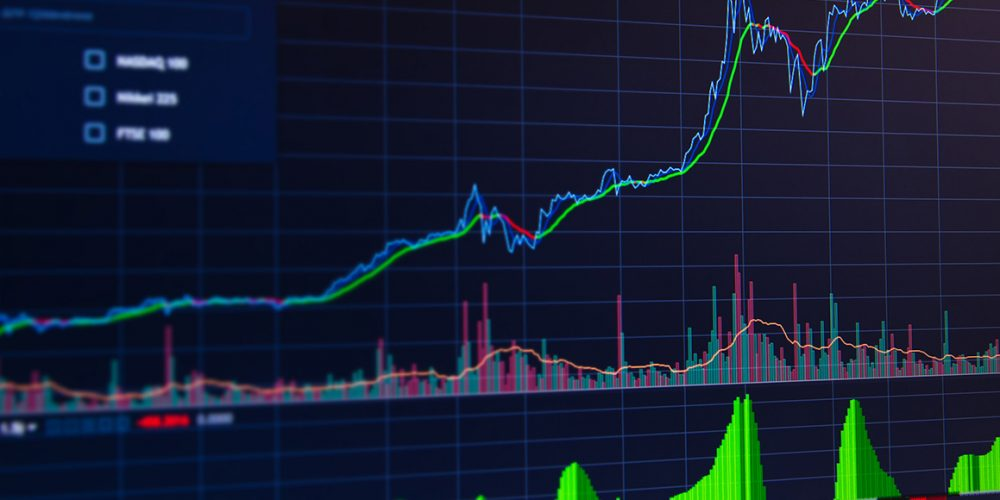

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
!pip install -q yfinance


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2025-01-21,228.899994,231.779999,226.940002,230.710007,230.710007,39951500,AMAZON
2025-01-22,232.020004,235.440002,231.190002,235.009995,235.009995,41448200,AMAZON
2025-01-23,234.100006,235.520004,231.509995,235.419998,235.419998,26404400,AMAZON
2025-01-24,234.500000,236.399994,232.929993,234.850006,234.850006,25890700,AMAZON
2025-01-27,226.210007,235.610001,225.860001,235.419998,235.419998,49428300,AMAZON
2025-01-28,234.289993,241.770004,233.979996,238.149994,238.149994,41587200,AMAZON
2025-01-29,239.020004,240.389999,236.149994,237.070007,237.070007,26091700,AMAZON
2025-01-30,237.139999,237.949997,232.220001,234.639999,234.639999,32020700,AMAZON
2025-01-31,236.500000,240.289993,236.410004,237.679993,237.679993,36110200,AMAZON


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [3]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,211.120400,213.141720,209.232000,211.282400,210.927217,5.702244e+07
std,25.730585,25.989427,25.433270,25.846083,26.049703,3.125495e+07
min,165.350006,166.399994,164.080002,165.000000,164.405121,1.398796e+07
25%,186.702496,187.400005,184.924995,186.430000,186.009815,4.101695e+07
50%,221.215004,223.685005,219.205002,221.620003,221.248512,4.970535e+07
75%,229.415001,231.300007,227.444996,229.000000,228.778297,6.312158e+07
max,258.190002,260.100006,257.630005,259.019989,259.019989,3.186799e+08


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-02-05 to 2025-02-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

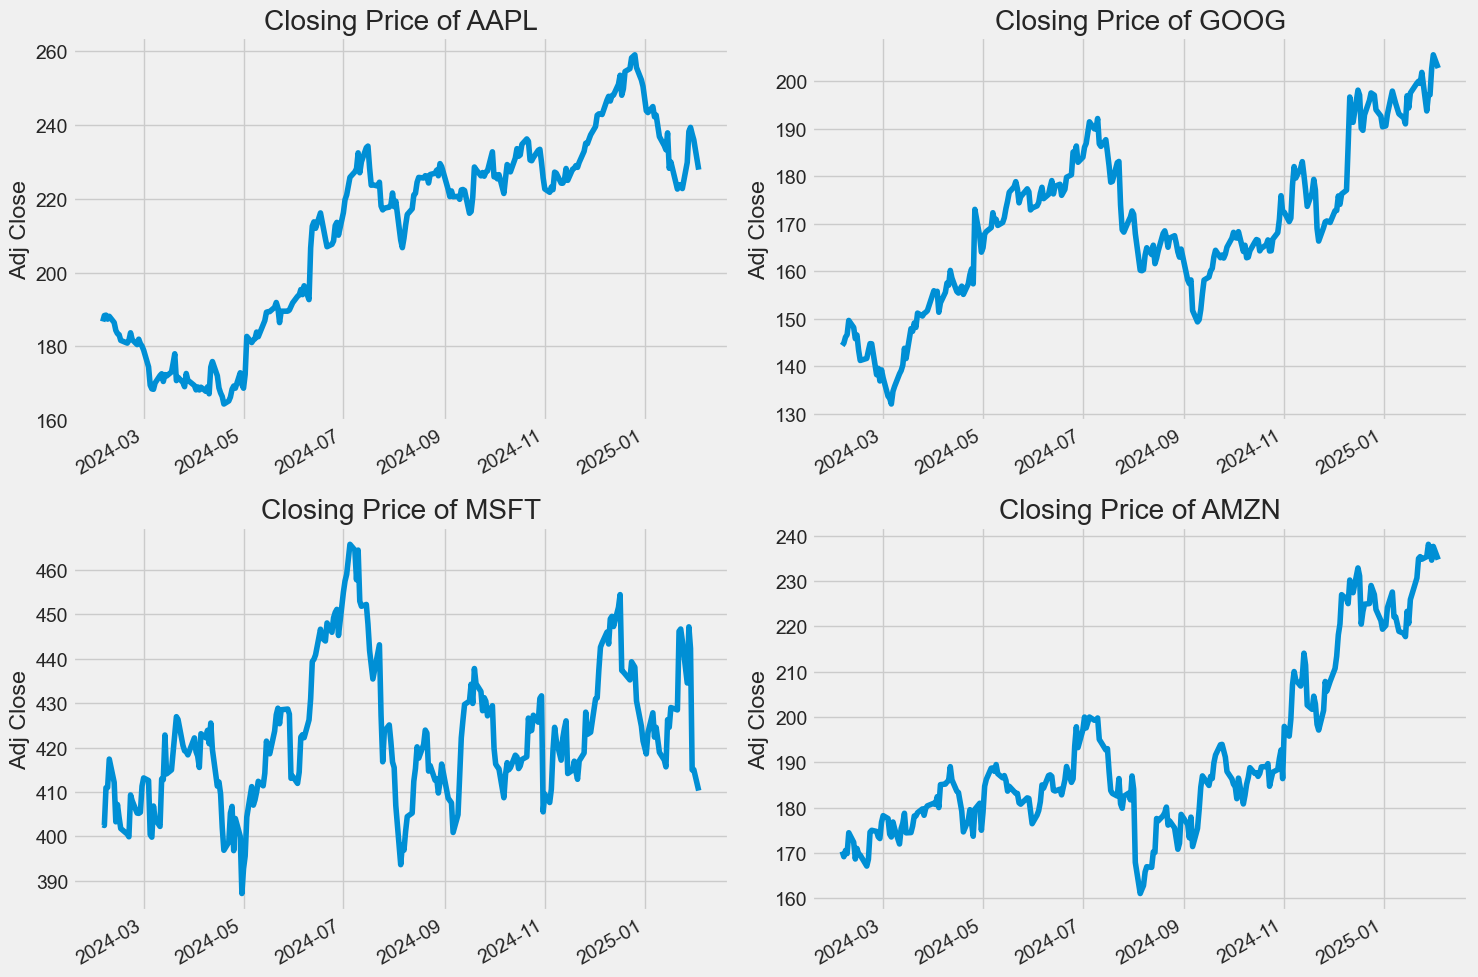

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

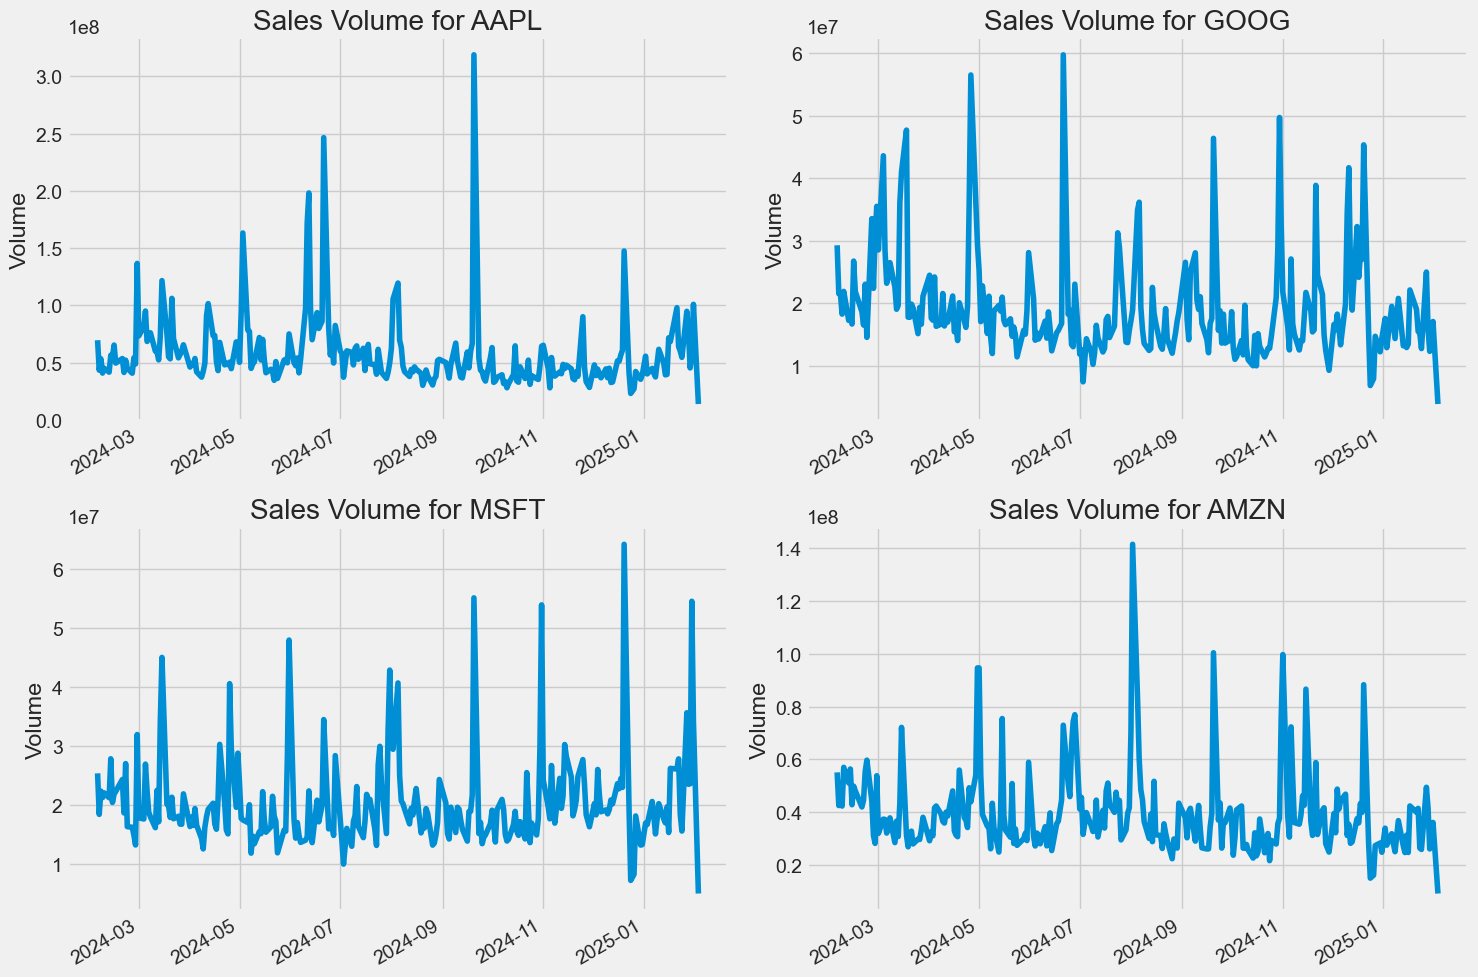

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

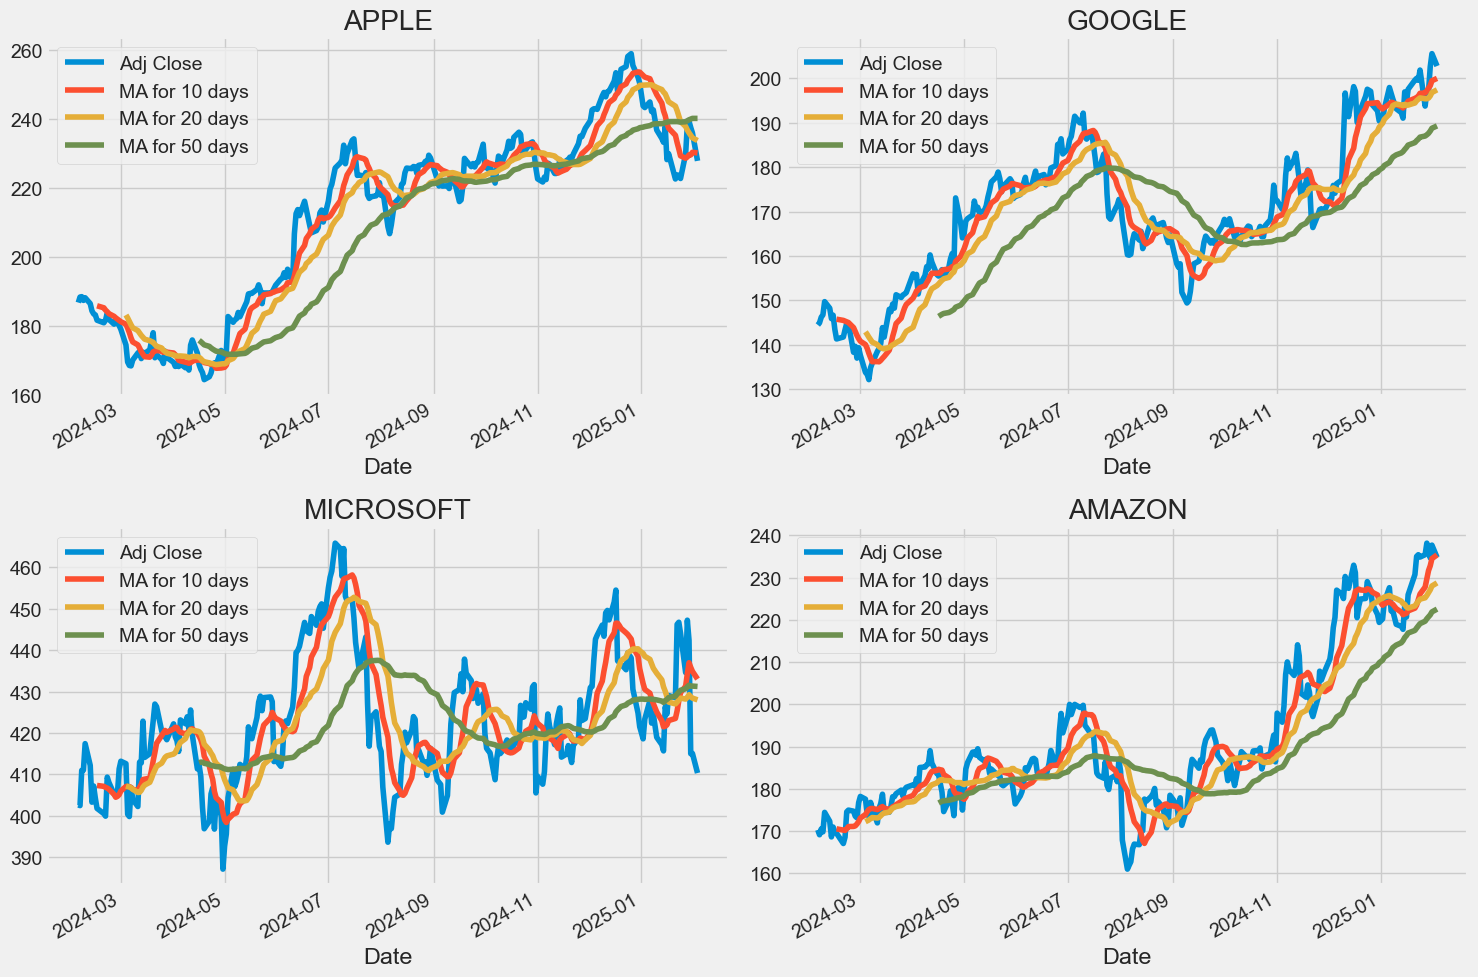

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

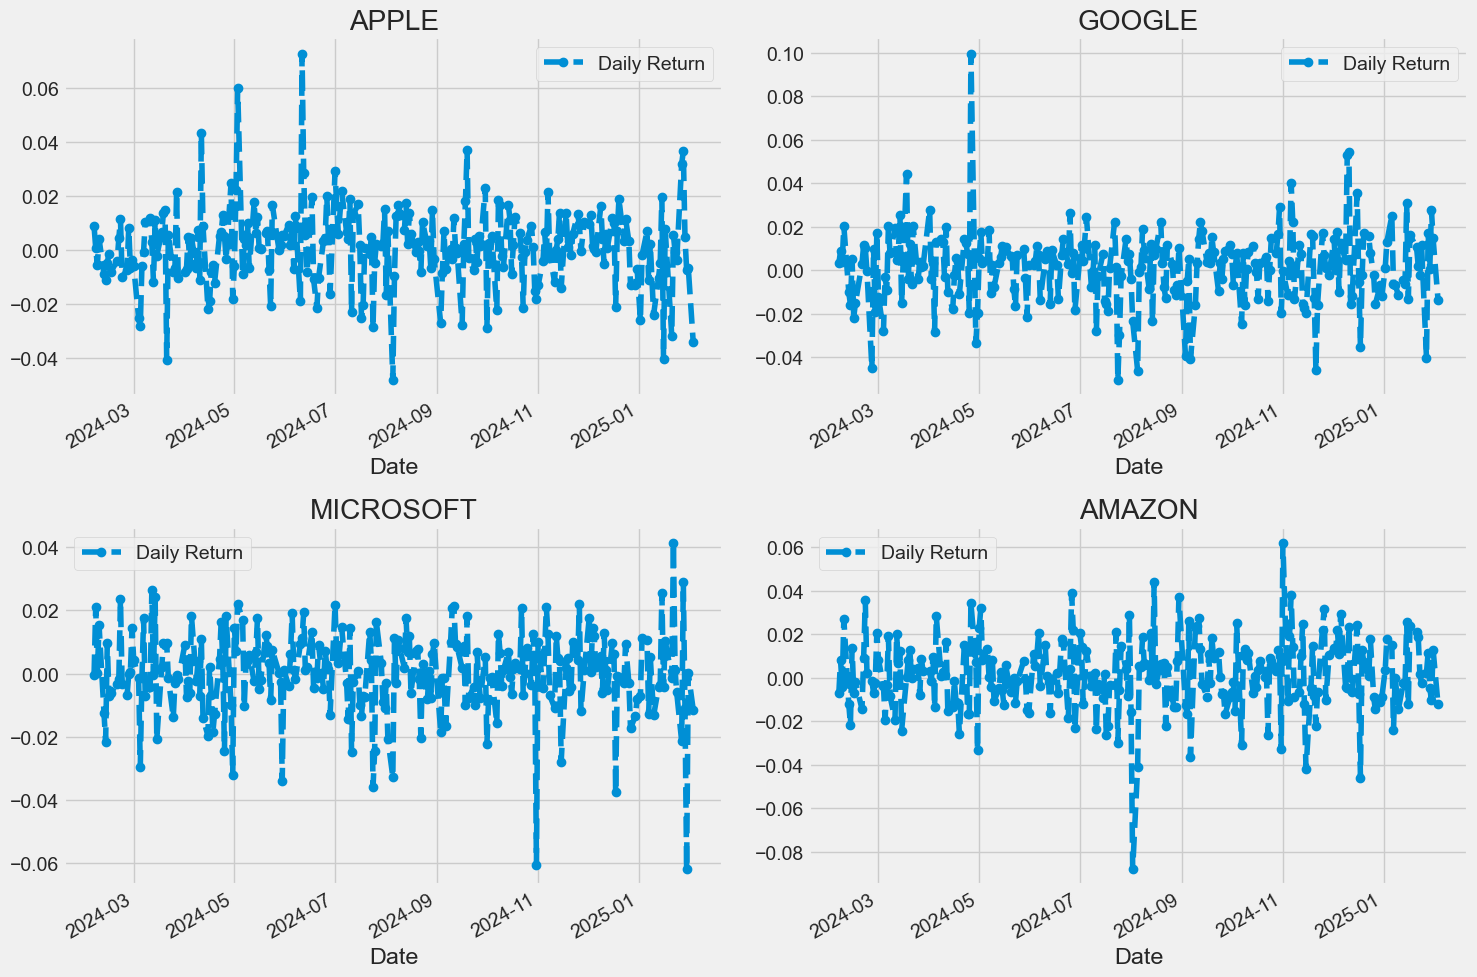

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

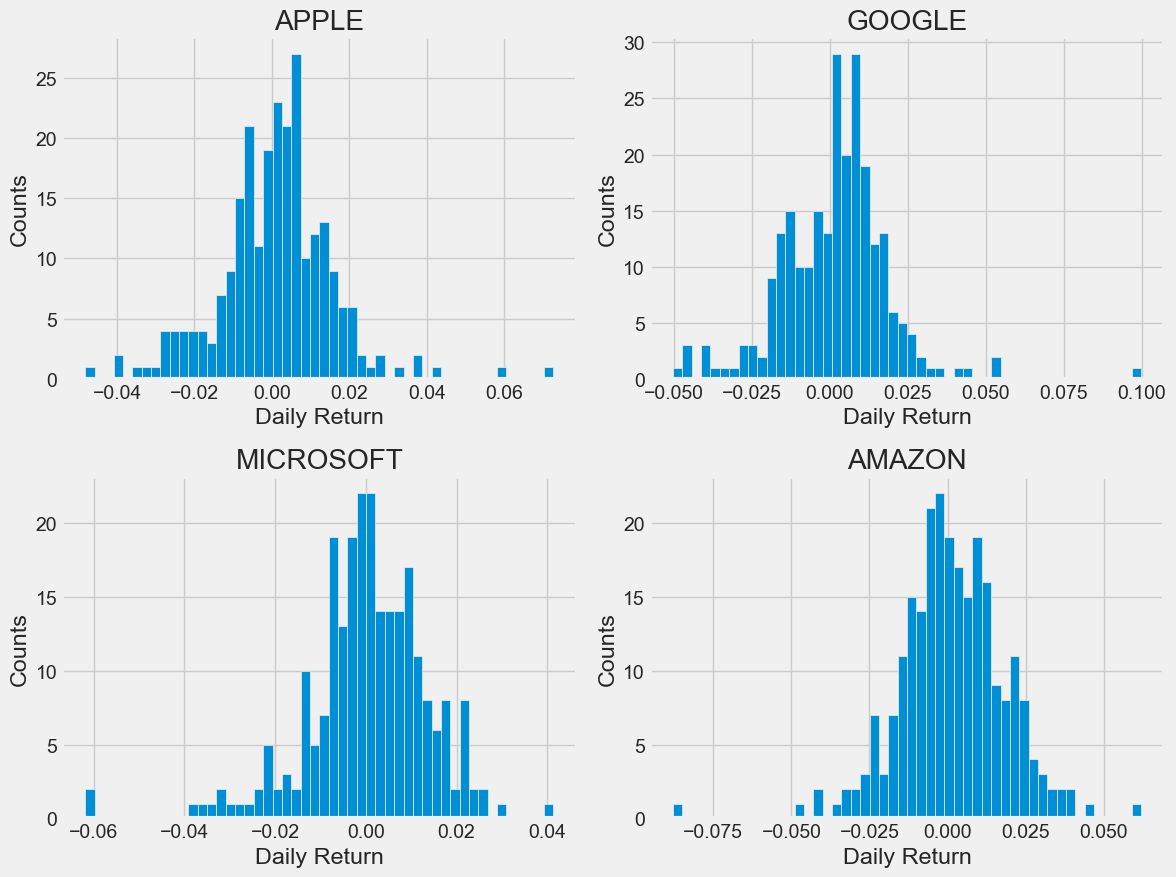

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-02-05,NaN,NaN,NaN,NaN
2024-02-06,0.008632,-0.006811,0.003312,-0.000394
2024-02-07,0.000581,0.008158,0.008734,0.021110
2024-02-08,-0.005755,-0.004046,0.003682,0.000145
2024-02-09,0.004094,0.027143,0.020378,0.015551


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

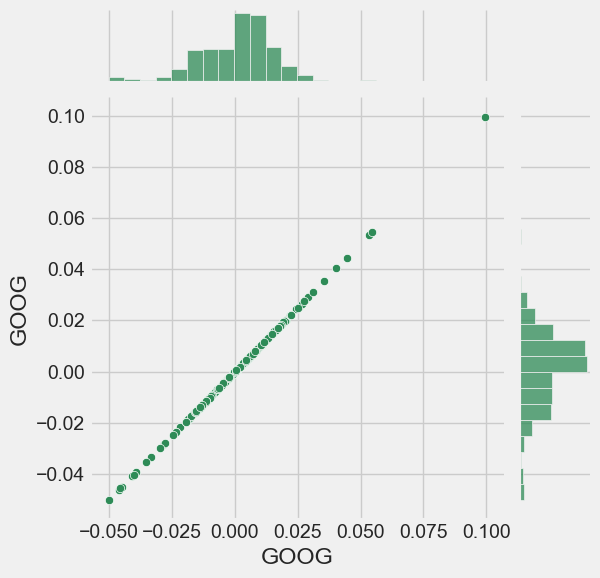

In [11]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

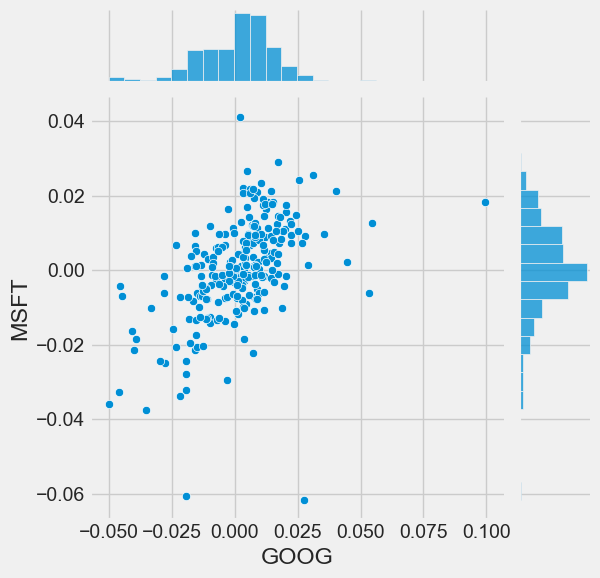

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

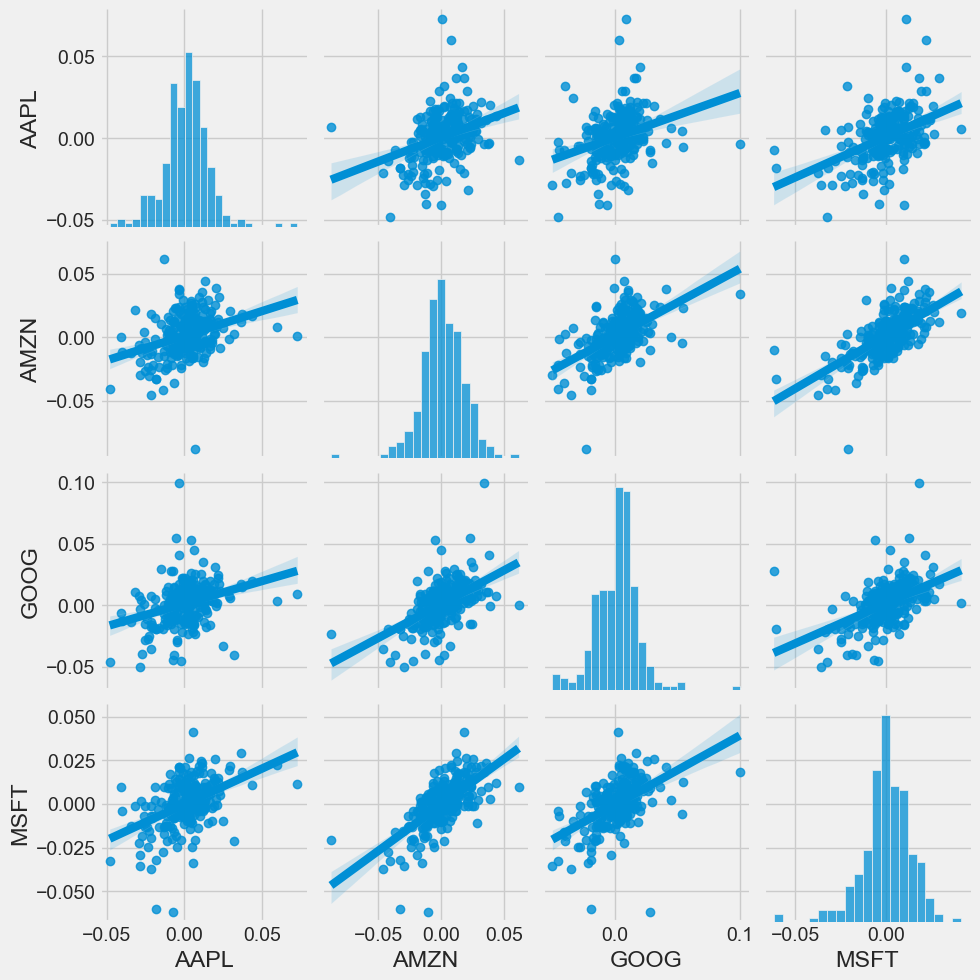

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

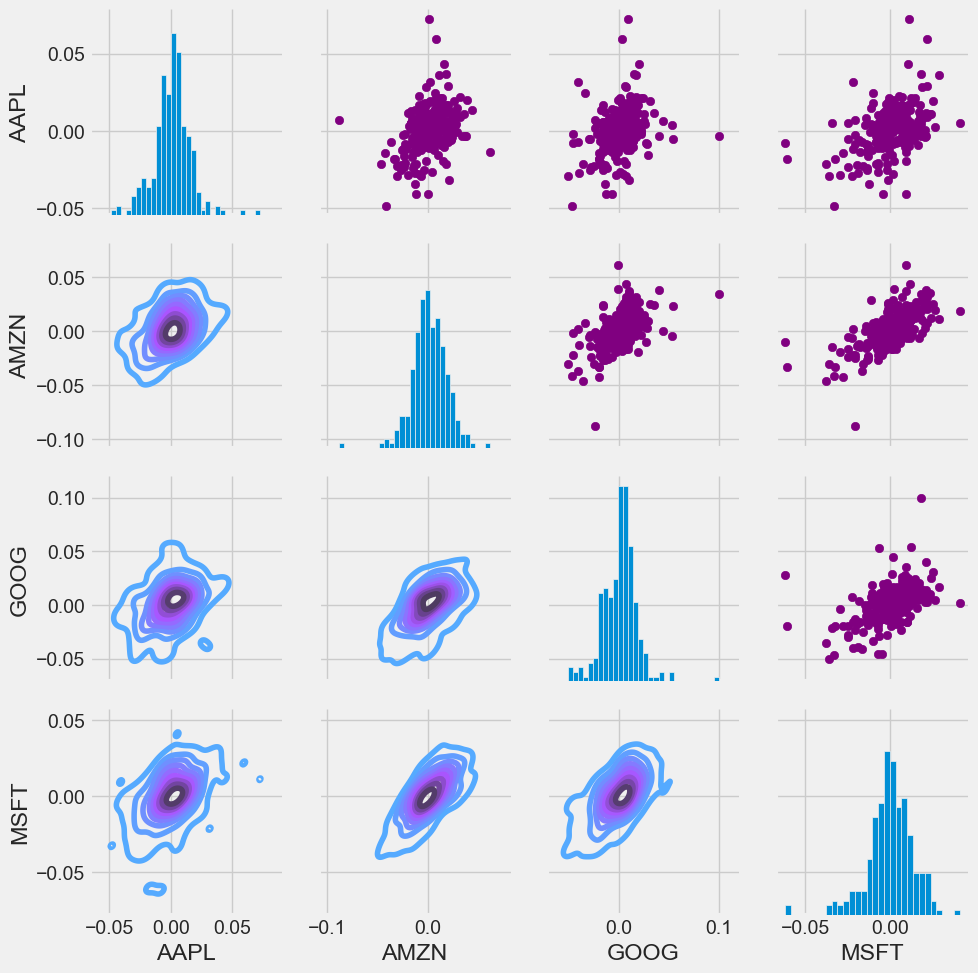

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

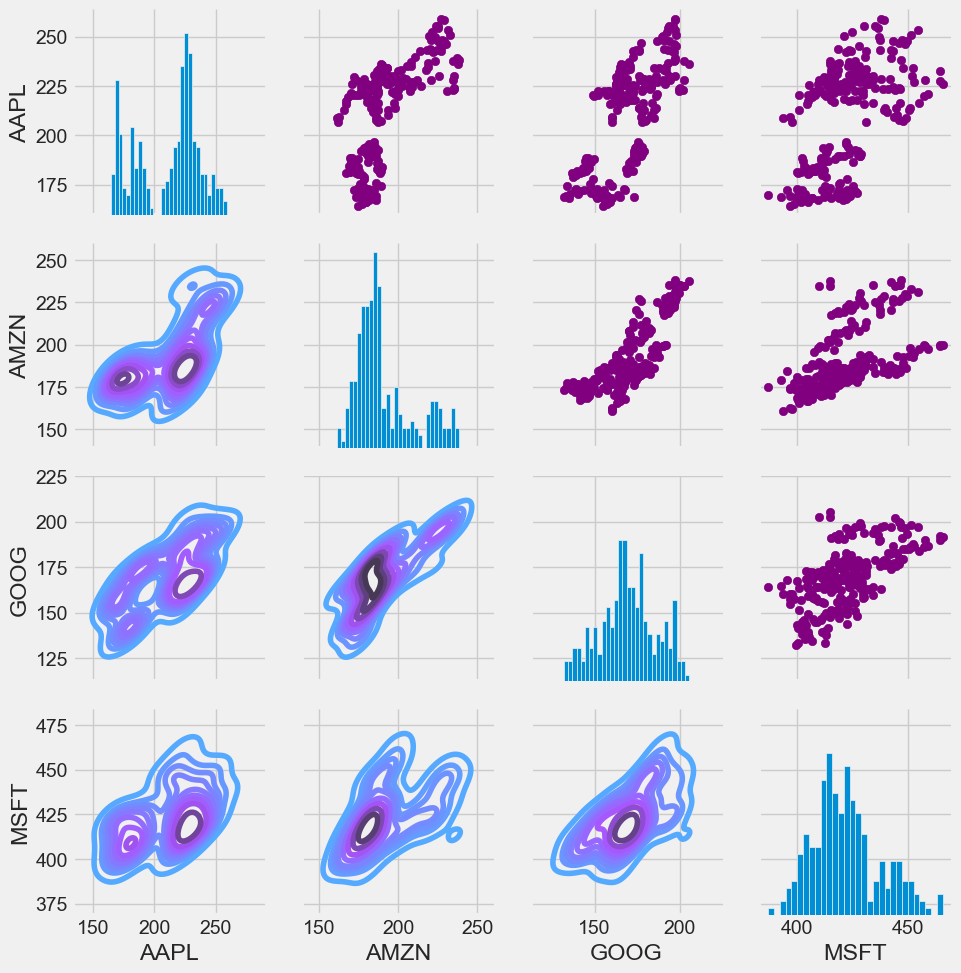

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

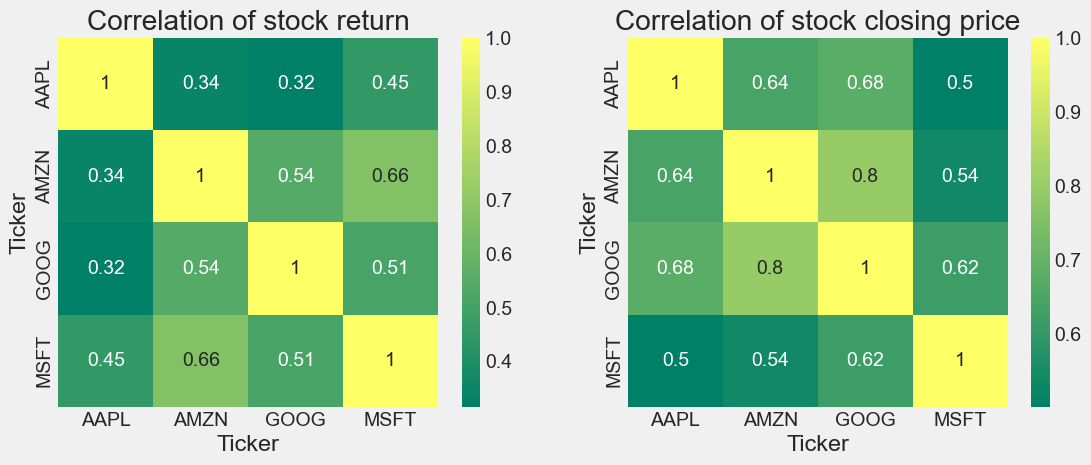

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

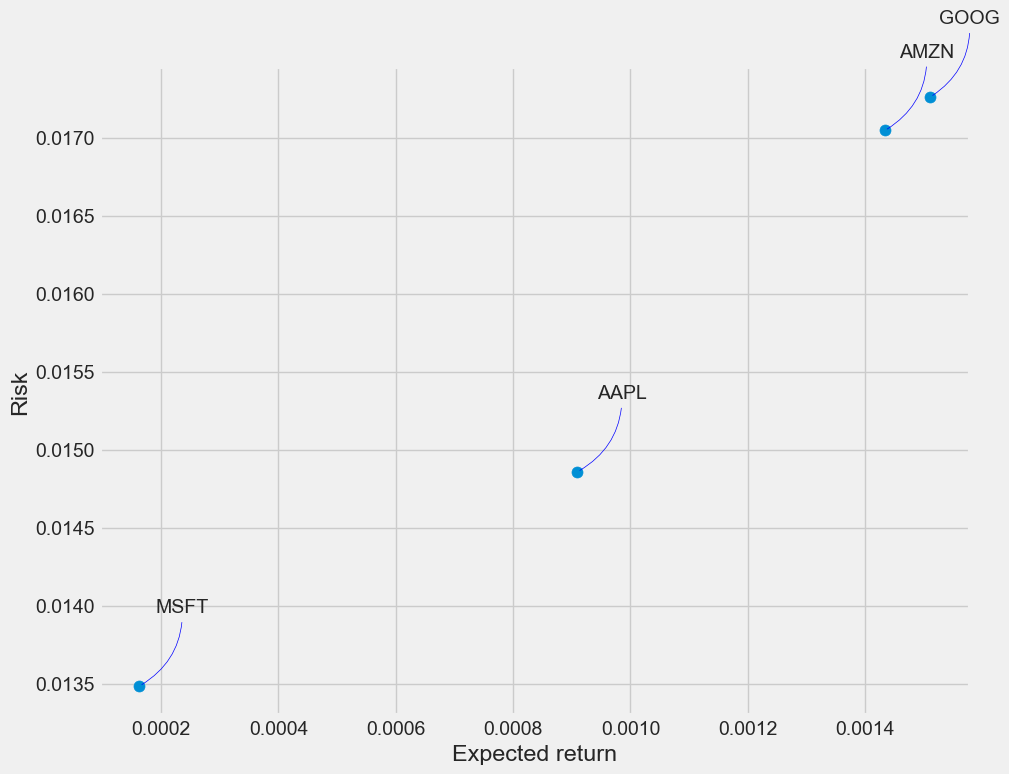

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [18]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.388998,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.455578,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.593856,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.725511,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.705327,394024400
...,...,...,...,...,...,...
2025-01-28,230.850006,240.190002,230.809998,238.259995,238.259995,75707600
2025-01-29,234.119995,239.860001,234.009995,239.360001,239.360001,45486100
2025-01-30,238.669998,240.789993,237.210007,237.589996,237.589996,55658300


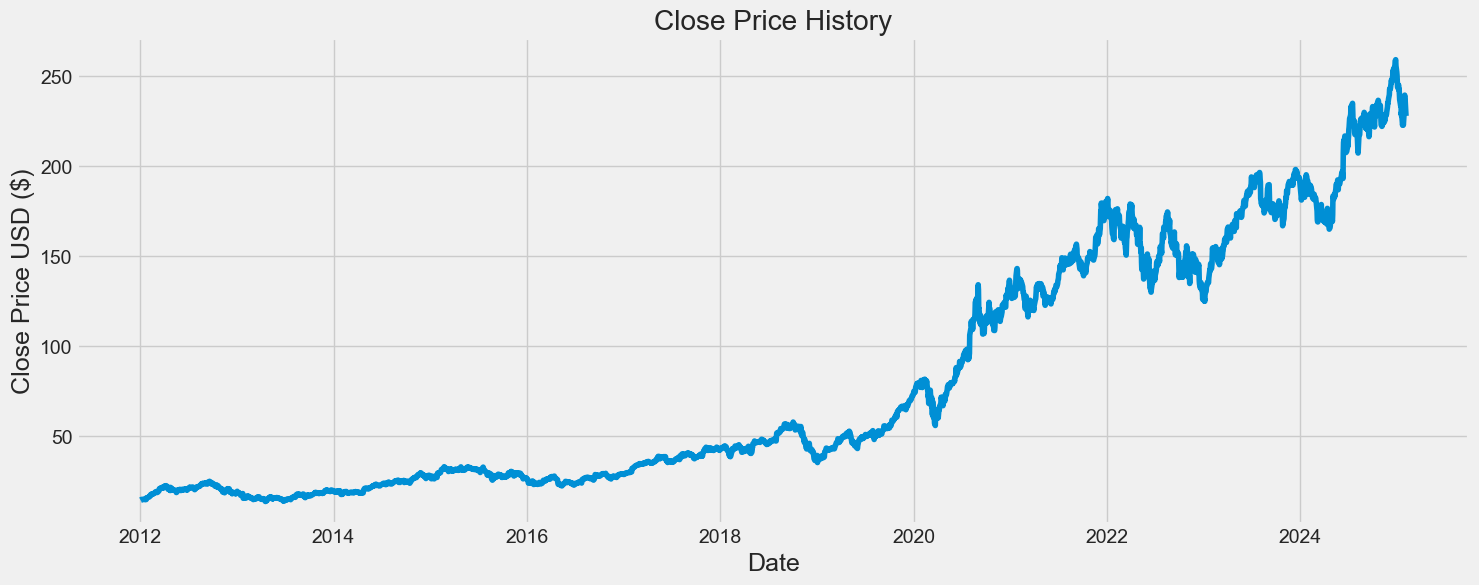

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3127

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0030166 ],
       [0.00333866],
       [0.00400756],
       ...,
       [0.91255651],
       [0.90606865],
       [0.87272548]])

In [22]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0030166 , 0.00333866, 0.00400756, 0.0046444 , 0.00454676,
       0.00476681, 0.00466626, 0.00449721, 0.00426696, 0.00497958,
       0.00562224, 0.00542405, 0.00433836, 0.0053745 , 0.0043544 ,
       0.00817979, 0.00788397, 0.00827015, 0.00910518, 0.00961086,
       0.00956859, 0.00941267, 0.01007719, 0.01070237, 0.01141062,
       0.0125546 , 0.01495767, 0.0149941 , 0.0163319 , 0.0173316 ,
       0.01561346, 0.01627507, 0.01626195, 0.01811709, 0.01785332,
       0.01834151, 0.0192188 , 0.019707  , 0.02111329, 0.02213776,
       0.02243359, 0.02253706, 0.0207854 , 0.02036278, 0.02042544,
       0.02207219, 0.02253561, 0.02353094, 0.02587718, 0.02900745,
       0.02842162, 0.02842307, 0.03068626, 0.03139451, 0.03089027,
       0.03042977, 0.02995032, 0.03154314, 0.03263612, 0.03309371])]
[0.03196284432003735]

[array([0.0030166 , 0.00333866, 0.00400756, 0.0046444 , 0.00454676,
       0.00476681, 0.00466626, 0.00449721, 0.00426696, 0.00497958,
       0.00562224, 0.00542405, 0.00

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Users\jiten\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3067/3067 ━━━━━━━━━━━━━━━━━━━━ 71s 22ms/step - loss: 0.0016


In [24]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


9.025784262317977

C:\Users\jiten\AppData\Local\Temp\ipykernel_9588\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


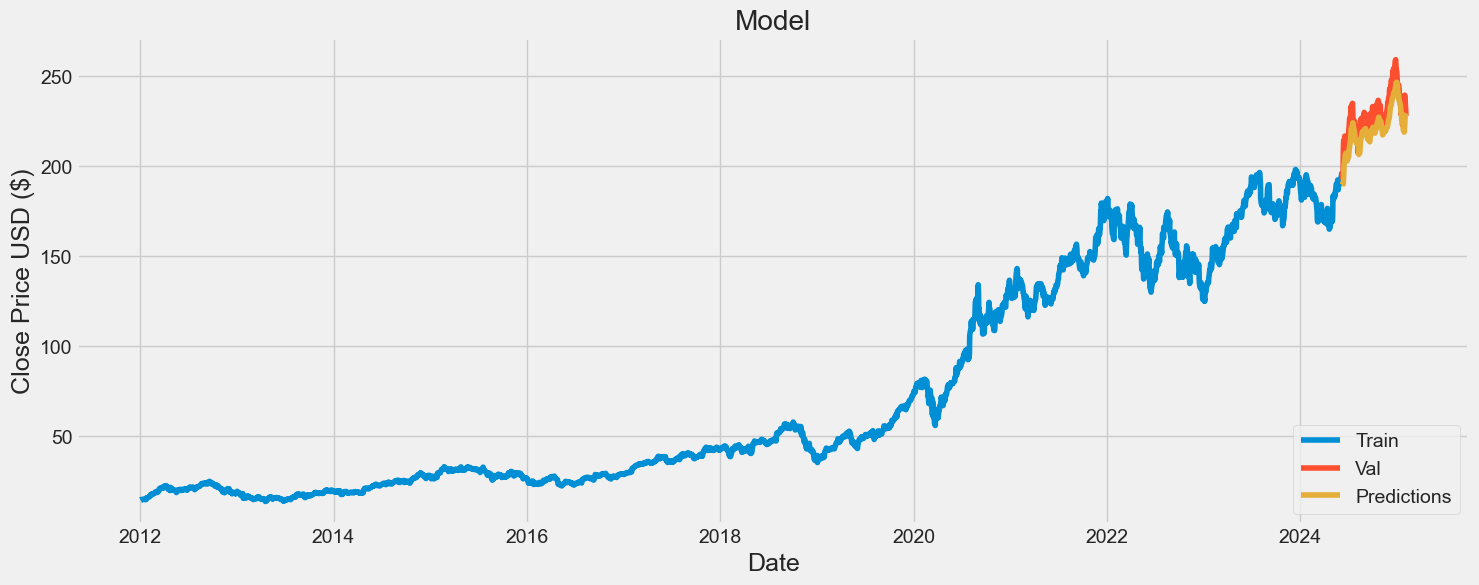

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-06-07,196.889999,189.515350
2024-06-10,193.119995,190.245529
2024-06-11,207.149994,190.081757
2024-06-12,213.070007,192.535431
2024-06-13,214.240005,196.630219
...,...,...
2025-01-28,238.259995,219.625946
2025-01-29,239.360001,222.694534
2025-01-30,237.589996,226.096130


# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
- How to measure the correlation between stocks.
- How to measure the risk of investing in a particular stock.

Do you have any questions?
Ask your questions in the comments below and I will do my best to answer.

References:
https://www.investopedia.com/terms/c/correlation.asp
[Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)

In [1]:
# Install required libraries
!pip install -q yfinance pandas_datareader matplotlib seaborn numpy tensorflow keras scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from pandas_datareader import data as pdr

# Set visualization style
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Enable yfinance override
yf.pdr_override()

# Define stock symbols
tech_stocks = ["AAPL", "GOOG", "MSFT", "AMZN"]

# Set start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Fetch stock data efficiently
df_list = {stock: yf.download(stock, start=start, end=end) for stock in tech_stocks}

# Combine data and label companies
for stock in tech_stocks:
    df_list[stock]["Company"] = stock

# Concatenate all stock data
df = pd.concat(df_list.values(), axis=0)

# Display last few rows
print(df.tail())



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2025-01-29  239.020004  240.389999  236.149994  237.070007  237.070007   
2025-01-30  237.139999  237.949997  232.220001  234.639999  234.639999   
2025-01-31  236.500000  240.289993  236.410004  237.679993  237.679993   
2025-02-03  234.059998  239.250000  232.899994  237.419998  237.419998   
2025-02-04  238.925003  242.520004  238.039993  242.059998  242.059998   

              Volume Company  
Date                          
2025-01-29  26091700    AMZN  
2025-01-30  32020700    AMZN  
2025-01-31  36162400    AMZN  
2025-02-03  37186200    AMZN  
2025-02-04  28587993    AMZN  


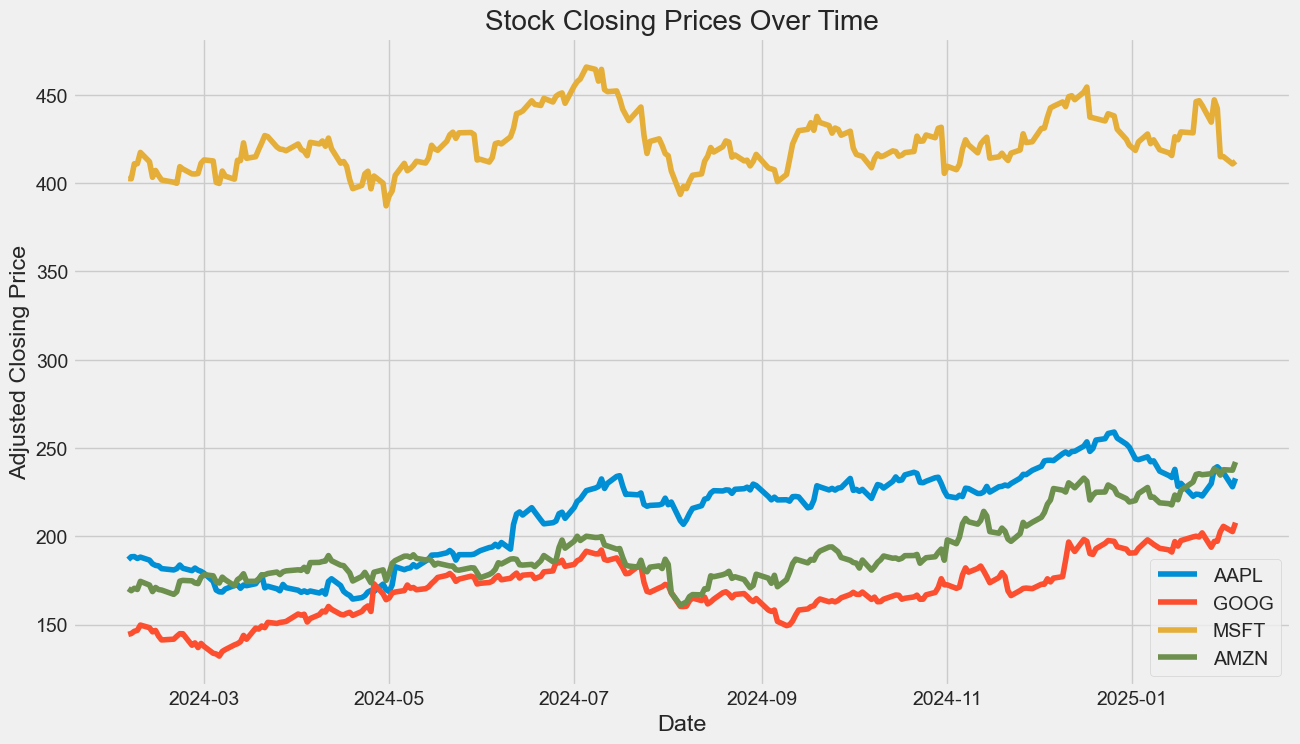

In [2]:
# Plot historical closing prices
plt.figure(figsize=(14, 8))
for stock in tech_stocks:
    plt.plot(df_list[stock].index, df_list[stock]["Adj Close"], label=stock)

plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Stock Closing Prices Over Time")
plt.legend()
plt.show()


In [6]:
# Choose a stock for prediction
stock = "AAPL"
data = df_list[stock][["Adj Close"]].values

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define train-test split dynamically
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Dynamically adjust time_step based on data size
time_step = min(60, len(train_data) // 5)  # Use at most 1/5th of training data

# Function to create dataset
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])

    X, Y = np.array(X), np.array(Y)

    if X.shape[0] == 0:
        print(f"⚠️ Not enough data for time_step={time_step}. Reducing time_step.")
        return None, None

    return X, Y

# Prepare LSTM training and test data
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# If X_test is still None, reduce time_step further
if X_train is None or X_test is None:
    raise ValueError("Dataset too small for LSTM. Try fetching more stock data.")

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Generate predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Ensure both are 1D arrays for trend comparison
Y_test = Y_test.flatten()
predictions = predictions.flatten()

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

# Compute percentage-based accuracy
percentage_error = np.abs((Y_test - predictions) / Y_test) * 100
accuracy = 100 - np.mean(percentage_error)

# Compute trend accuracy
actual_trend = np.where(np.diff(Y_test, prepend=Y_test[0]) > 0, 1, 0)
predicted_trend = np.where(np.diff(predictions, prepend=predictions[0]) > 0, 1, 0)
trend_accuracy = np.mean(actual_trend == predicted_trend) * 100

# Print results
print(f"📊 Model Evaluation Metrics:")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 R² Score: {r2:.4f}")
print(f"🔹 Trend Accuracy: {trend_accuracy:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
📊 Model Evaluation Metrics:
🔹 RMSE: 196543320.1855
🔹 MAE: 196463442.5365
🔹 R² Score: -1229.5281
🔹 Trend Accuracy: 40.00%


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

# Generate predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f"📊 Model Evaluation Metrics:")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 R² Score: {r2:.4f}")


c:\Users\jiten\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1576
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0241
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0204
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0134
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0148
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0099
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0144
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0083
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0093
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0072
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0084
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0079
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0072
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0067
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0105
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━

In [10]:
# Compute percentage error
percentage_error = np.abs((Y_test - predictions) / Y_test) * 100

# Compute accuracy (100 - mean percentage error)
accuracy = 100 - np.mean(percentage_error)

print(f"✅ Model Accuracy (Based on Percentage Error): {accuracy:.2f}%")


✅ Model Accuracy (Based on Percentage Error): 96.52%


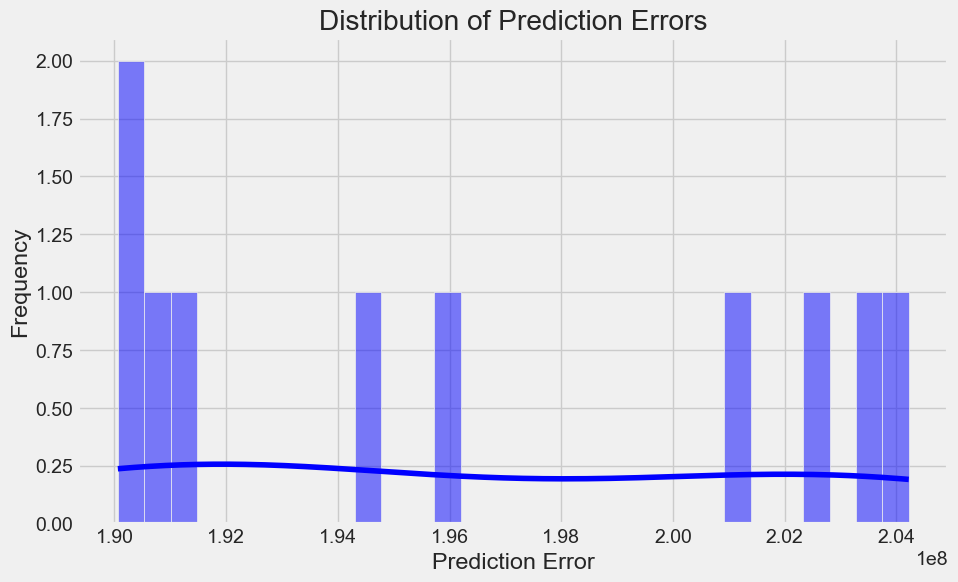

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals (errors)
errors = Y_test - predictions.flatten()

# Plot error distribution
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color="blue")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


In [16]:
# Convert actual and predicted values into Up (1) or Down (0) movements
actual_trend = np.where(np.diff(Y_test, prepend=Y_test[0]) > 0, 1, 0)
predicted_trend = np.where(np.diff(predictions.flatten(), prepend=predictions[0]) > 0, 1, 0)

# Compute accuracy for trend prediction
trend_accuracy = np.mean(actual_trend == predicted_trend) * 100

print(f"📈 Stock Movement Prediction Accuracy: {trend_accuracy:.2f}%")


📈 Stock Movement Prediction Accuracy: 40.00%


In [18]:
# Save the LSTM model
model.save('lstm_model.h5')
